### Monthly temperature analysis of European cities according to their geographical location

The objective of this notebook is to apply the PCA to a database with several variables in order to simplify its analysis and to be able to reach conclusions regarding the nature of the temperature of several European cities

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#TODO ADD other needed libraries

Here we take a look at the data, delete the regions column as it is not of interest to us, and store the city names separately to have a num array with the numerical data for analysis.

In [8]:
temperature_df =pd.read_csv('../data/temperatures.csv')
temperature_df.head()


,Unnamed: 0,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


In [4]:
first_column = temperature_df.iloc[:,0]
observations = temperature_df.iloc[:,1:]
observations.head()
observations =observations.drop('Region', axis=1)

### 2. Exploring the Data

Once the data for the PCA has been imported and selected, begin with a preliminary analysis to identify relationships between the variables.

Now we are going to look for relationships between variables at a glance. We also use functions such as corr() from DataFrame and heatMap() from the seaborn library.
We also used scatter_matrix() function from pandas.plotting to display scatter plots for all pairs of numerical variables
To finilly identify which variables are the most strongly correlated

In [69]:
observations.corr()

#pd.plotting.scatter_matrix(observations)


,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
Janvier,1.000000,0.990001,0.955844,0.831300,0.635780,0.565348,0.573917,0.644986,0.814065,0.911908,0.967044,0.994137,0.911452,-0.763089,-0.650342,-0.498882
Fevrier,0.990001,1.000000,0.979253,0.880420,0.692374,0.623886,0.623093,0.691115,0.850174,0.929664,0.972954,0.982678,0.936229,-0.713358,-0.721498,-0.500490
Mars,0.955844,0.979253,1.000000,0.945430,0.795911,0.720413,0.716400,0.779523,0.910234,0.964201,0.973382,0.956523,0.971231,-0.597919,-0.813760,-0.488616
Avril,0.831300,0.880420,0.945430,1.000000,0.943402,0.888344,0.862399,0.895226,0.968357,0.962006,0.922261,0.851011,0.971558,-0.331647,-0.924644,-0.333542
Mai,0.635780,0.692374,0.795911,0.943402,1.000000,0.973487,0.941597,0.938789,0.940246,0.876671,0.789824,0.676723,0.884352,-0.030682,-0.912342,-0.137209
Juin,0.565348,0.623886,0.720413,0.888344,0.973487,1.000000,0.983711,0.964775,0.928095,0.833464,0.736768,0.608702,0.844274,0.087196,-0.874470,-0.061870
Juillet,0.573917,0.623093,0.716400,0.862399,0.941597,0.983711,1.000000,0.986772,0.931957,0.837789,0.738564,0.617054,0.848467,0.090879,-0.847200,-0.070565
Aout,0.644986,0.691115,0.779523,0.895226,0.938789,0.964775,0.986772,1.000000,0.961172,0.885200,0.792694,0.680596,0.894804,-0.006178,-0.871231,-0.130728
Septembre,0.814065,0.850174,0.910234,0.968357,0.940246,0.928095,0.931957,0.961172,1.000000,0.974605,0.922166,0.840775,0.978107,-0.255392,-0.894231,-0.255237
Octobre,0.911908,0.929664,0.964201,0.962006,0.876671,0.833464,0.837789,0.885200,0.974605,1.000000,0.980690,0.934266,0.995338,-0.447152,-0.849798,-0.342043


<Axes: >

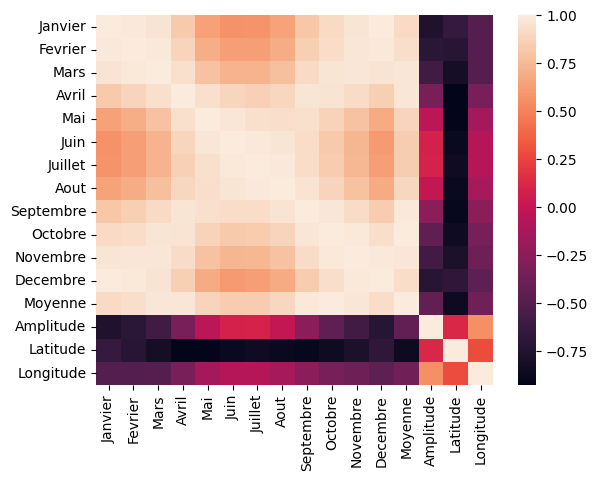

In [ ]:
sns.heatmap(observations.corr())

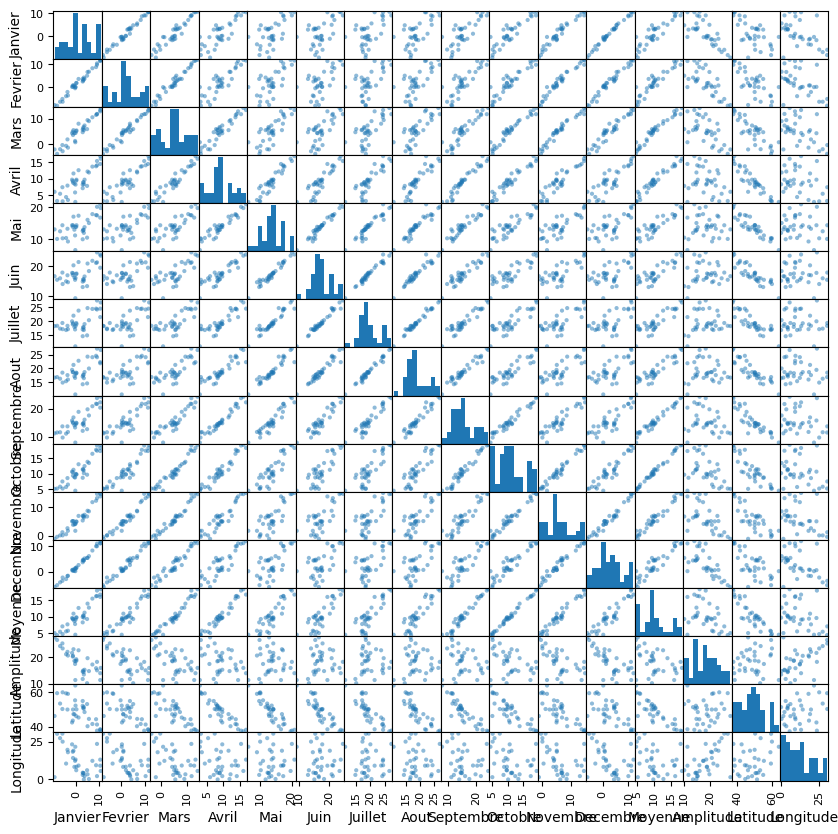

In [5]:
scatter_matrix = pd.plotting.scatter_matrix(observations, figsize=(10, 10))
plt.show()

### The relationships found are as follows:
- Length has a low correlation with everything, amplitude in general also has a low correlation, latitude has a high correlation with everything, but negative, and as expected, the mean has a high correlation with all months. 

- At last all months have a strong correlation between them.

### 3. Preprocessing the Data
To work in PCA, the data must be centered and scaled. This is done as follows.



In [72]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming `X` is your original data as a NumPy array
X = observations.to_numpy()

# Manual standardization using ddof=1
mean = np.mean(X, axis=0)
std = np.std(X, axis=0, ddof=1)  # Using sample standard deviation
Z_manual = (X - mean) / std

# Verify the variance is now 1 (using ddof=1)
print('Variances after manual scaling:', Z_manual.var(axis=0, ddof=1)) # Should be ~1.0



Variances after manual scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


By centering and scaling the data, we find the mean at 0, the variance at 1, and the sum of all eigenvalues is equal to the number of variables, in our case 16.

### 4. Performing the PCA




Now that the data is standardized, we will apply PCA using the sklearn library. After this, we will choose the axes necessary to explain the variance of the data. To do this, we obtain the cumulative sum of the eigenvalues and plot it. What we are looking for now is to apply the three criteria we know to choose how many axes we are going to use to represent the data.

In [18]:
from sklearn.decomposition import PCA

# Now apply PCA
pca = PCA(n_components=16)
pca.fit(Z_manual)

eigenvalues = (pca.singular_values_ ** 2) / (Z_manual.shape[0] - 1)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)
eigenvalues = (pca.singular_values_ ** 2) / (Z.shape[0] - 1)
print('Eigenvalues sum:', eigenvalues.sum())

[7.80348705e-01 1.58875359e-01 3.99434398e-02 1.19297438e-02
 4.34297716e-03 1.96249738e-03 1.37958483e-03 5.01853907e-04
 3.50882178e-04 1.37597866e-04 8.82754178e-05 5.92781767e-05
 4.17325963e-05 2.24947089e-05 1.06237504e-05 4.95441561e-06]
[0.78034871 0.93922406 0.9791675  0.99109725 0.99544022 0.99740272
 0.99878231 0.99928416 0.99963504 0.99977264 0.99986092 0.99992019
 0.99996193 0.99998442 0.99999505 1.        ]
[20.60363307  9.29667657  4.66146235  2.54750478  1.5370685   1.03324662
  0.86631065  0.52250218  0.43689805  0.2735932   0.21913883  0.17957541
  0.1506736   0.11062152  0.07602184  0.05191534]
Eigenvalues sum: 16.0


A quick check of the sum of the eigenvalues, which should equal 1.

In [75]:
# Decidir cuántos componentes mantener (ej: 95% de varianza)
n_componentes_90 = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.90) + 1
print(f'Components required for 90% variance: {n_componentes_90}')

Components required for 90% variance: 2


In [21]:
kaiser_criterion = eigenvalues > 1
n_components_kaiser = sum(kaiser_criterion)

print("Eigenvalues:", eigenvalues)
print("Does it comply with Kaiser's rule?", kaiser_criterion)
print("Number of components to be preserved:", n_components_kaiser)

Eigenvalues: [1.24855793e+01 2.54200574e+00 6.39095037e-01 1.90875901e-01
 6.94876346e-02 3.13999581e-02 2.20733574e-02 8.02966251e-03
 5.61411484e-03 2.20156586e-03 1.41240668e-03 9.48450827e-04
 6.67721541e-04 3.59915342e-04 1.69980006e-04 7.92706498e-05]
Does it comply with Kaiser's rule? [ True  True False False False False False False False False False False
 False False False False]
Number of components to be preserved: 2


The elbow criterion suggests retaining 3 components.


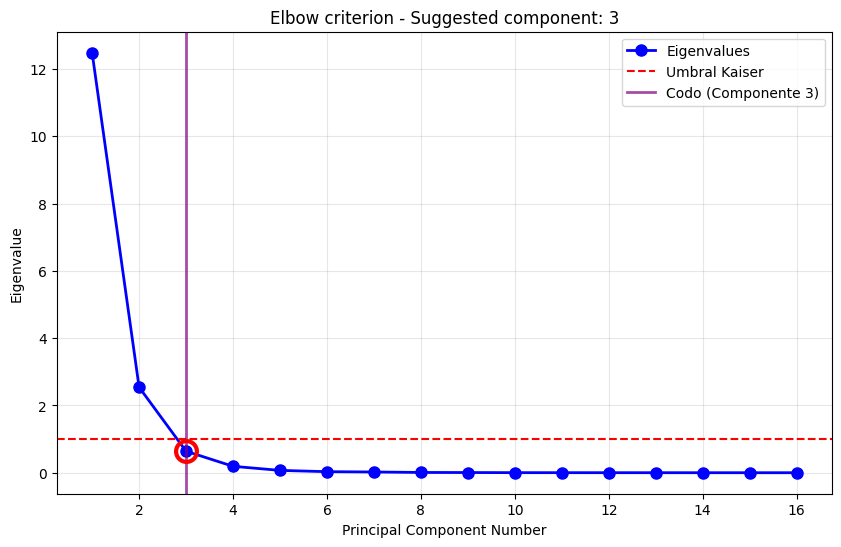

In [28]:
# Elbow detection
def find_elbow_point(eigenvalues):
    """Find the elbow point using the maximum distance method."""
    n_components = len(eigenvalues)
    
    # Crear línea desde el primer al último punto
    first_point = np.array([1, eigenvalues[0]])
    last_point = np.array([n_components, eigenvalues[-1]])
    max_distance = 0
    elbow_index = 0
    
    for i in range(n_components):
        point = np.array([i+1, eigenvalues[i]])
        
        # Calcular distancia del punto a la línea
        numerator = np.abs(
            (last_point[1]-first_point[1])*point[0] - 
            (last_point[0]-first_point[0])*point[1] + 
            last_point[0]*first_point[1] - last_point[1]*first_point[0]
        )
        denominator = np.sqrt(
            (last_point[1]-first_point[1])**2 + (last_point[0]-first_point[0])**2
        )
        distance = numerator / denominator
        
        if distance > max_distance:
            max_distance = distance
            elbow_index = i
    
    return elbow_index + 1  # +1 porque los componentes empiezan en 1

# Aplicar detección del codo
component_numbers = range(1, len(eigenvalues) + 1)
elbow_component = find_elbow_point(eigenvalues)
print(f"The elbow criterion suggests retaining {elbow_component} components.")

# Gráfica con el codo marcado
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, eigenvalues, 'bo-', linewidth=2, markersize=8, label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Umbral Kaiser')

# Marcar el codo
plt.axvline(x=elbow_component, color='purple', linestyle='-', 
           linewidth=2, alpha=0.7, label=f'Codo (Componente {elbow_component})')
plt.plot(elbow_component, eigenvalues[elbow_component-1], 'ro', 
        markersize=15, markerfacecolor='none', markeredgewidth=3)

plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.title(f'Elbow criterion - Suggested component: {elbow_component}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Now, to determine which axes to keep, the following criteria are used:
- First criterion: only the first two components would be used, as they achieve an alpha of more than 90%.
- Second criterion: with an average of more than 1, the first two axes meet the condition.
- Third criterion: using the maximum distance, the elbow was found in the third component.

The first two will be used because they exceed 90%.

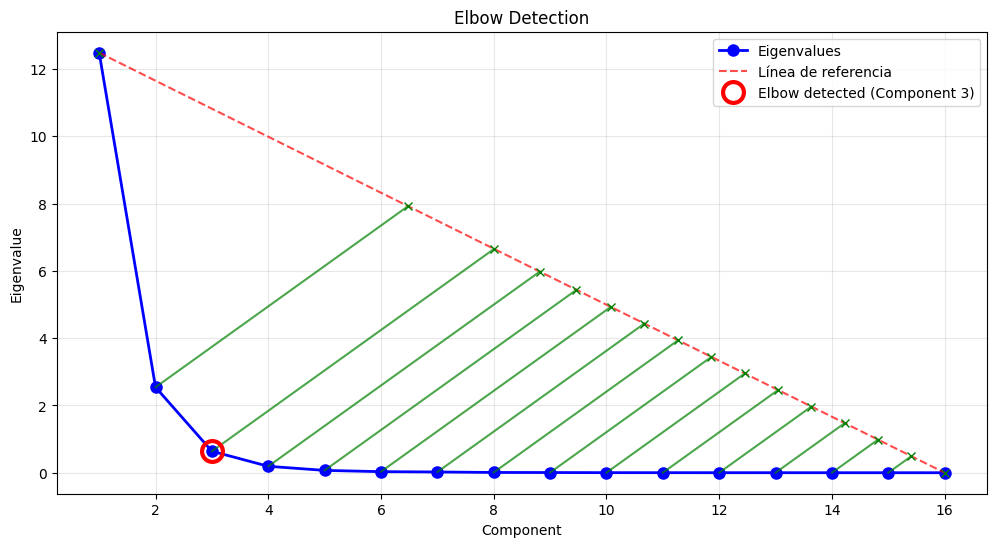

Elbow component: 3


In [77]:
def plot_elbow_detection_corrected(eigenvalues):
    n_components = len(eigenvalues)
    first_point = np.array([1, eigenvalues[0]])
    last_point = np.array([n_components, eigenvalues[-1]])
    m = (last_point[1] - first_point[1]) / (last_point[0] - first_point[0])  # slope
    b = first_point[1] - m * first_point[0]  # intercept
    m_perp = -1 / m  # Perpendicular slope
    
    plt.figure(figsize=(12, 6))
    
    components = range(1, n_components + 1)
    plt.plot(components, eigenvalues, 'bo-', linewidth=2, markersize=8, label='Eigenvalues')
    
    plt.plot([1, n_components], [eigenvalues[0], eigenvalues[-1]], 'r--', 
             label='Línea de referencia', alpha=0.7)
    
    distances = []
    for i in range(n_components):
        point = np.array([i+1, eigenvalues[i]])
        
        numerator = np.abs(
            (last_point[1]-first_point[1])*point[0] - 
            (last_point[0]-first_point[0])*point[1] + 
            last_point[0]*first_point[1] - last_point[1]*first_point[0]
        )
        denominator = np.sqrt(
            (last_point[1]-first_point[1])**2 + (last_point[0]-first_point[0])**2
        )
        distance = numerator / denominator
        distances.append(distance)
        
        x1, y1 = first_point
        x2, y2 = last_point
        x0, y0 = point
        b0 = y0 - m_perp * x0  
        
        x_proj = (b - b0) / (m_perp - m)  
        y_proj = m * x_proj + b  
        
        plt.plot([x0, x_proj], [y0, y_proj], 'g-', alpha=0.7, linewidth=1.5)
        plt.plot(x_proj, y_proj, 'gx', markersize=6)  # Marcar punto de intersección
    
    elbow_idx = np.argmax(distances)
    plt.plot(components[elbow_idx], eigenvalues[elbow_idx], 'ro', 
             markersize=15, markerfacecolor='none', markeredgewidth=3,
             label=f'Elbow detected (Component {elbow_idx+1})')
    
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Elbow Detection')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return distances

# Ejecutar visualización corregida
distancias = plot_elbow_detection_corrected(eigenvalues)
print("Elbow component:", np.argmax(distancias) + 1)

Here what I wanted to do was to explain how the elbow method was applied, I consider it a bit complicated to choose where in the graph the most pronounced slope change is actually generated in order to be able to select the elbow, This is why we select it by drawing a line from the first to the last point and selecting which of the points is furthest to this line. 
The green lines are the perpendicular lines with which distances were calculated, if good may seem that they are not perpendicular, it is an illusion to be representing more values in x than in y

### 5. Projection of Observations

The objective is to project the observations onto the principal axes.


Now what we are going to do is to project the observations on the main axes that we have already chosen, and we will try to find relationships between the different variables, whether differences or similarities.

In [35]:
pca_2 = PCA(n_components=2)
pca_2.fit(Z) # Fit the PCA model first
c = pca_2.transform(Z)
print("Explained Variance Ratio:", pca_2.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", pca_2.explained_variance_ratio_.cumsum())
print("Singular Values:", pca_2.singular_values_)
print("Singular vectors:", pca_2.components_)

Explained Variance Ratio: [0.78034871 0.15887536]
Cumulative Explained Variance Ratio: [0.78034871 0.93922406]
Singular Values: [20.60363307  9.29667657]
Singular vectors: [[ 0.25468826  0.26310598  0.27448705  0.27763509  0.25453384  0.24283806
   0.24211099  0.25389238  0.27748772  0.28099805  0.27471289  0.2598524
   0.28246243 -0.11880701 -0.25013664 -0.10596994]
 [-0.2593615  -0.21889002 -0.13397444  0.05733797  0.24459763  0.31144315
   0.30644495  0.25211295  0.11063296 -0.01550358 -0.11728693 -0.22295538
  -0.01174918  0.55714087 -0.16325338  0.36898063]]


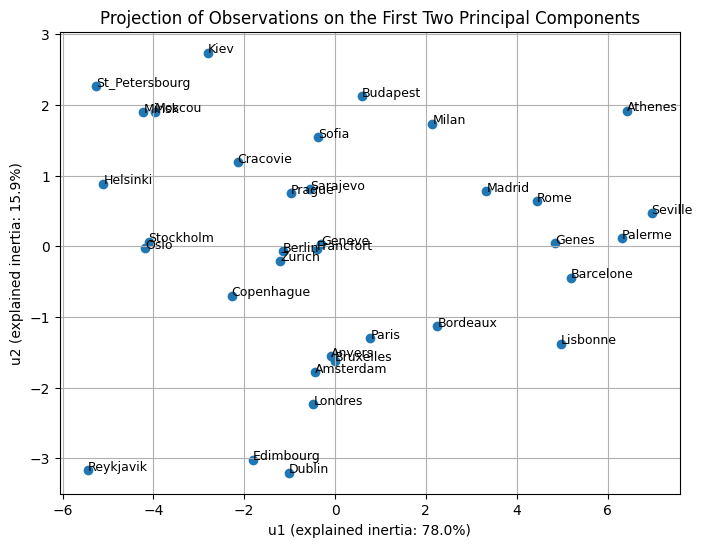

In [38]:
index_x = 0  # First principal component
index_y = 1  # Second principal component
plt.figure(figsize=(8, 6))

plt.scatter(c[:, index_x], c[:, index_y])
plt.title('Projection of Observations on the First Two Principal Components')
plt.xlabel('u{} (explained inertia: {}%)'.format(index_x+1, round(100*pca_2.explained_variance_ratio_[index_x],1)))
plt.ylabel('u{} (explained inertia: {}%)'.format(index_y+1, round(100*pca_2.explained_variance_ratio_[index_y],1)))
plt.grid(True)

# Label the points with city names
for i,(x,y) in enumerate(c[:,[index_x,index_y]]):
    plt.text(x, y,first_column[i] , fontsize=9)

plt.show()

In [50]:
def complete_contribution_analysis(c, cities, pca_model):
    """Complete contribution analysis with interpretation"""
    
    # 1. Calculate contributions
    contributions = (c**2) / (c.shape[0] - 1)
    contributions_pct = contributions / contributions.sum(axis=0) * 100
    
    # 2. Identify most influential observations
    top_pc1_pos = np.argsort(c[:, 0])[-3:][::-1]  # Top 3 positive PC1
    top_pc1_neg = np.argsort(c[:, 0])[:3]         # Top 3 negative PC1
    top_pc2_pos = np.argsort(c[:, 1])[-3:][::-1]  # Top 3 positive PC2
    top_pc2_neg = np.argsort(c[:, 1])[:3]         # Top 3 negative PC2
    
    print("=== ANALYSIS OF MOST INFLUENTIAL OBSERVATIONS ===\n")
    
    print("PC1 - POSITIVE OBSERVATIONS (Define positive end of axis):")
    for idx in top_pc1_pos:
        print(f"  • {cities[idx]}: coord={c[idx, 0]:.3f} ({contributions_pct[idx, 0]:.1f}%)")
    
    print("\nPC1 - NEGATIVE OBSERVATIONS (Define negative end of axis):")
    for idx in top_pc1_neg:
        print(f"  • {cities[idx]}: coord={c[idx, 0]:.3f} ({contributions_pct[idx, 0]:.1f}%)")
    
    print("\nPC2 - POSITIVE OBSERVATIONS (Define positive end of axis):")
    for idx in top_pc2_pos:
        print(f"  • {cities[idx]}: coord={c[idx, 1]:.3f} ({contributions_pct[idx, 1]:.1f}%)")
    
    print("\nPC2 - NEGATIVE OBSERVATIONS (Define negative end of axis):")
    for idx in top_pc2_neg:
        print(f"  • {cities[idx]}: coord={c[idx, 1]:.3f} ({contributions_pct[idx, 1]:.1f}%)")
    
    # 3. Qualitative interpretation
    print("\n=== INTERPRETATION ===")
    print("Cities with high contributions to PC1 define the most important")
    print("characteristics of that component. For example:")
    print("- If PC1 represents 'continentality', cities at opposite ends")
    print("  represent the most continental vs most maritime climates")
    print("- Cities with high contributions to PC2 define secondary")
    print("  but equally important characteristics")
    
    return contributions_pct

# Execute complete analysis
contributions = complete_contribution_analysis(c, first_column, pca_2)

=== ANALYSIS OF MOST INFLUENTIAL OBSERVATIONS ===

PC1 - POSITIVE OBSERVATIONS (Define positive end of axis):
  • Seville: coord=6.971 (11.4%)
  • Athenes: coord=6.435 (9.8%)
  • Palerme: coord=6.318 (9.4%)

PC1 - NEGATIVE OBSERVATIONS (Define negative end of axis):
  • Reykjavik: coord=-5.440 (7.0%)
  • St_Petersbourg: coord=-5.255 (6.5%)
  • Helsinki: coord=-5.102 (6.1%)

PC2 - POSITIVE OBSERVATIONS (Define positive end of axis):
  • Kiev: coord=2.740 (8.7%)
  • St_Petersbourg: coord=2.269 (6.0%)
  • Budapest: coord=2.123 (5.2%)

PC2 - NEGATIVE OBSERVATIONS (Define negative end of axis):
  • Dublin: coord=-3.207 (11.9%)
  • Reykjavik: coord=-3.173 (11.6%)
  • Edimbourg: coord=-3.020 (10.6%)

=== INTERPRETATION ===
Cities with high contributions to PC1 define the most important
characteristics of that component. For example:
- If PC1 represents 'continentality', cities at opposite ends
  represent the most continental vs most maritime climates
- Cities with high contributions to PC2 d

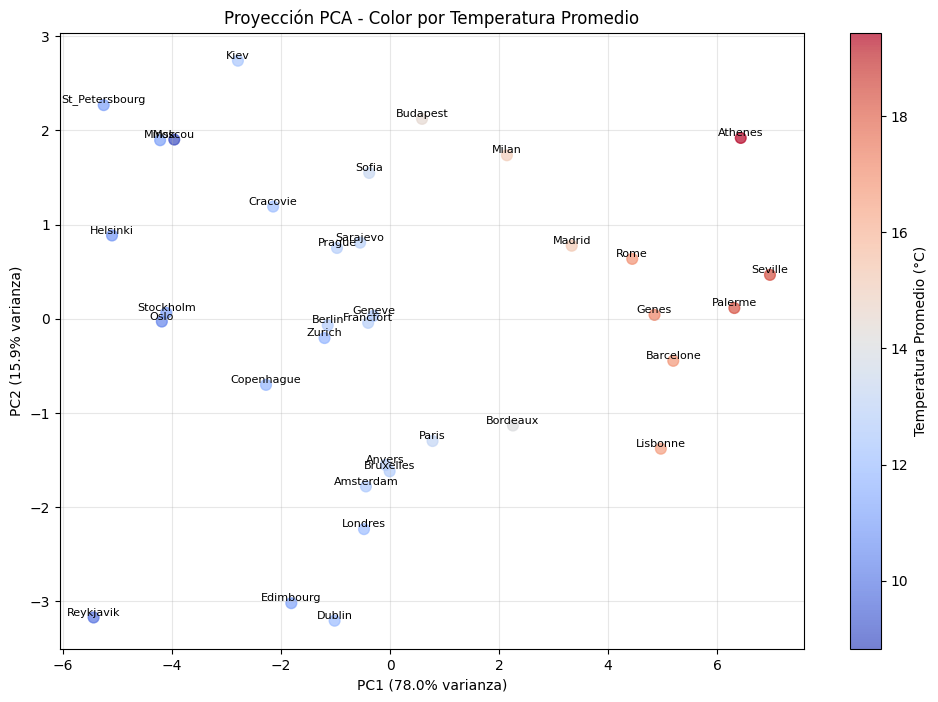

=== TEMPERATURE ANALYSIS ===
Minimum temperature8.8°C
Maximum temperature: 19.4°C
Mean temperature: 13.3°C


In [45]:

temperatura_promedio = observations.mean(axis=1)  # Media por fila (ciudad)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(c[:, index_x], c[:, index_y], 
                     c=temperatura_promedio, 
                     cmap='coolwarm', 
                     s=60, alpha=0.7)

plt.colorbar(scatter, label='Temperatura Promedio (°C)')
plt.title('Proyección PCA - Color por Temperatura Promedio')
plt.xlabel('PC1 ({}% varianza)'.format(round(100*pca_2.explained_variance_ratio_[index_x],1)))
plt.ylabel('PC2 ({}% varianza)'.format(round(100*pca_2.explained_variance_ratio_[index_y],1)))
plt.grid(True, alpha=0.3)

# Etiquetas para las ciudades
for i, (x, y) in enumerate(c[:, [index_x, index_y]]):
    plt.text(x, y, first_column[i], fontsize=8, ha='center', va='bottom')

plt.show()

# Automatic pattern analysis
print("=== TEMPERATURE ANALYSIS ===")
print(f"Minimum temperature{temperatura_promedio.min():.1f}°C")
print(f"Maximum temperature: {temperatura_promedio.max():.1f}°C")
print(f"Mean temperature: {temperatura_promedio.mean():.1f}°C")

Here a certain relationship can be observed between temperature and projection on the two chosen axes

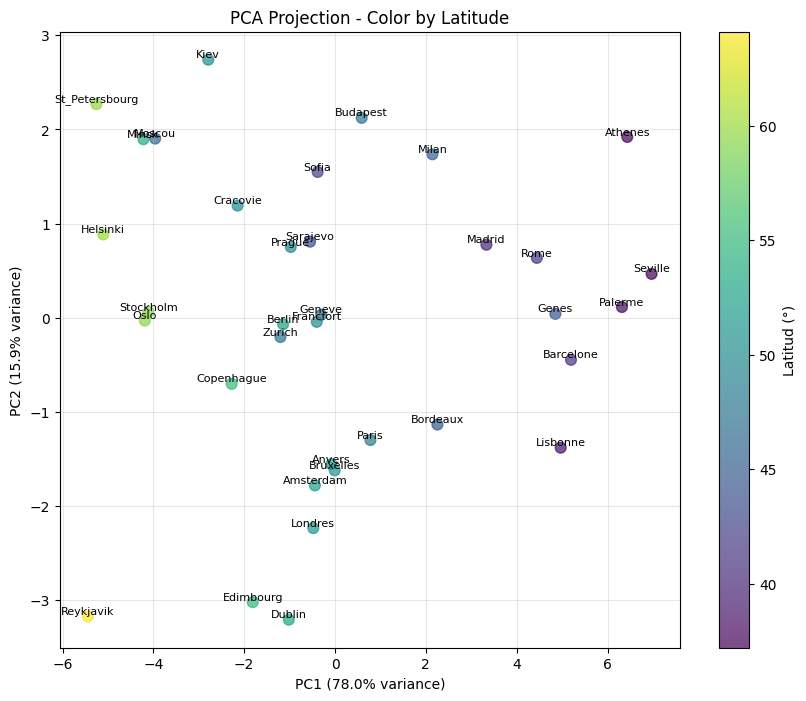

=== LATITUDE ANALYSIS ===
Minimum latitude: 37.2°
Maximum latitude: 64.1°


In [71]:
observations_latitude = temperature_df['Latitude'].to_numpy()
latitudes = observations_latitude  

plt.figure(figsize=(10, 8))
scatter = plt.scatter(c[:, index_x], c[:, index_y], 
                     c=latitudes, 
                     cmap='viridis', 
                     s=60, alpha=0.7)

plt.colorbar(scatter, label='Latitud (°)')
plt.title('PCA Projection - Color by Latitude')
plt.xlabel('PC1 ({}% variance)'.format(round(100*pca_2.explained_variance_ratio_[index_x],1)))
plt.ylabel('PC2 ({}% variance)'.format(round(100*pca_2.explained_variance_ratio_[index_y],1)))
plt.grid(True, alpha=0.3)

# Etiquetas para las ciudades
for i, (x, y) in enumerate(c[:, [index_x, index_y]]):
    plt.text(x, y, first_column[i], fontsize=8, ha='center', va='bottom')

plt.show()

# Análisis automático de patrones
print("=== LATITUDE ANALYSIS ===")
print(f"Minimum latitude: {latitudes.min():.1f}°")
print(f"Maximum latitude: {latitudes.max():.1f}°")

There is a strong relationship between temperature and data representation using PCA, as well as latitude. Groups can be easily created by finding a relationship between temperature, latitude, and each of the axes.

In [52]:
# Calculate the squared coordinates of the observations
squared_coords = c**2

# Calculate total squared distance from origin (for 2D)
total_squared_distance = squared_coords.sum(axis=1)

print("=== QUALITY OF REPRESENTATION (COS²) ===")
print("Observation\t\tCOS² Axis 1\tCOS² Axis 2")
print("-" * 50)

for i in range(len(total_squared_distance)):
    # CORRECTION: Calculate COS² for each axis
    cos2_axis1 = squared_coords[i, 0] / total_squared_distance[i]  # Quality on PC1
    cos2_axis2 = squared_coords[i, 1] / total_squared_distance[i]  # Quality on PC2
    
    print(f"{first_column[i]:<15}\t{cos2_axis1:.3f}\t\t{cos2_axis2:.3f}")

=== QUALITY OF REPRESENTATION (COS²) ===
Observation		COS² Axis 1	COS² Axis 2
--------------------------------------------------
Amsterdam      	0.058		0.942
Athenes        	0.918		0.082
Berlin         	0.996		0.004
Bruxelles      	0.000		1.000
Budapest       	0.071		0.929
Copenhague     	0.913		0.087
Dublin         	0.091		0.909
Helsinki       	0.971		0.029
Kiev           	0.509		0.491
Cracovie       	0.764		0.236
Lisbonne       	0.928		0.072
Londres        	0.044		0.956
Madrid         	0.949		0.051
Minsk          	0.832		0.168
Moscou         	0.812		0.188
Oslo           	1.000		0.000
Paris          	0.265		0.735
Prague         	0.627		0.373
Reykjavik      	0.746		0.254
Rome           	0.980		0.020
Sarajevo       	0.316		0.684
Sofia          	0.058		0.942
Stockholm      	1.000		0.000
Anvers         	0.003		0.997
Barcelone      	0.993		0.007
Bordeaux       	0.798		0.202
Edimbourg      	0.265		0.735
Francfort      	0.988		0.012
Geneve         	0.990		0.010
Genes          	1.000		0.000
M

All cities are well represented by one of the two main axes, yielding results very close to 1.

### 6. Projection of Variables (Correlation Circle)

The objective is now to project the variables inside the correlation circle onto the factorial axes.

1. Which formula from the course gives the coordinates of the variables in the considered subspace ?

1. Use the attribute `components_` of the `PCA` class to obtain the eigenvectors (or principal vectors) corresponding to the eigenvalues. Deduce the correlations between the original variables and the first principal factors.

1. Represent the projected variables on the relevant factorial plane(s) with line segments or arrows starting from the origin. Label each point and draw the correlation circle with the `Circle()` function from `matplotlib.pyplot`.

1. Find the strongly correlated variables (positively or negatively) and the weakly correlated variables.

1. Determine which variables contribute most to each principal component (both positively and negatively) and provide an interpretation of the different axes.

1. By combining the two projections (variables and observations), summarize the main insights provided by the PCA including:
- interpretation of each axis (meaning of new variables),
- groups of observations sharing similar characteristics.


The correlation circle tool will now be used in order to derive with greater certainty the correlation between the original variables and the main factors chosen, and an interpretation of the different axes is generated.

In [55]:
def project_variables_correlation_circle(pca, feature_names, Z, c):
    """
    Project variables onto the correlation circle in factorial space
    
    Parameters:
    - pca: Fitted PCA model
    - feature_names: Names of the original variables
    - Z: Standardized data
    - c: Principal components (projected observations)
    """
    
    # Method 1: Using PCA components and explained variance
    variable_coords = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    print("=== VARIABLE COORDINATES IN FACTORIAL PLANE ===")
    print("Variable\t\tPC1\t\tPC2")
    print("-" * 50)
    
    for i, name in enumerate(feature_names):
        print(f"{name:<15}\t{variable_coords[i, 0]:.3f}\t\t{variable_coords[i, 1]:.3f}")
    
    return variable_coords

# Get feature names (assuming you dropped 'Region')
feature_names = observations.columns.tolist()

# Calculate variable coordinates
variable_coordinates = project_variables_correlation_circle(pca_2, feature_names, Z, c)

=== VARIABLE COORDINATES IN FACTORIAL PLANE ===
Variable		PC1		PC2
--------------------------------------------------
Janvier        	0.900		-0.414
Fevrier        	0.930		-0.349
Mars           	0.970		-0.214
Avril          	0.981		0.091
Mai            	0.899		0.390
Juin           	0.858		0.497
Juillet        	0.855		0.489
Aout           	0.897		0.402
Septembre      	0.981		0.176
Octobre        	0.993		-0.025
Novembre       	0.971		-0.187
Decembre       	0.918		-0.355
Moyenne        	0.998		-0.019
Amplitude      	-0.420		0.888
Latitude       	-0.884		-0.260
Longitude      	-0.374		0.588


The months have a very good representativity using the first axis especially, in the case of the amplitude, it seems to be very well represented by the second axis, the latitude very well represented but in a negative way with the first axis and the longitude really is not very well represented by either, this may mean that the longitude is not especially significant with respect to temperature.

0.9903977015450752


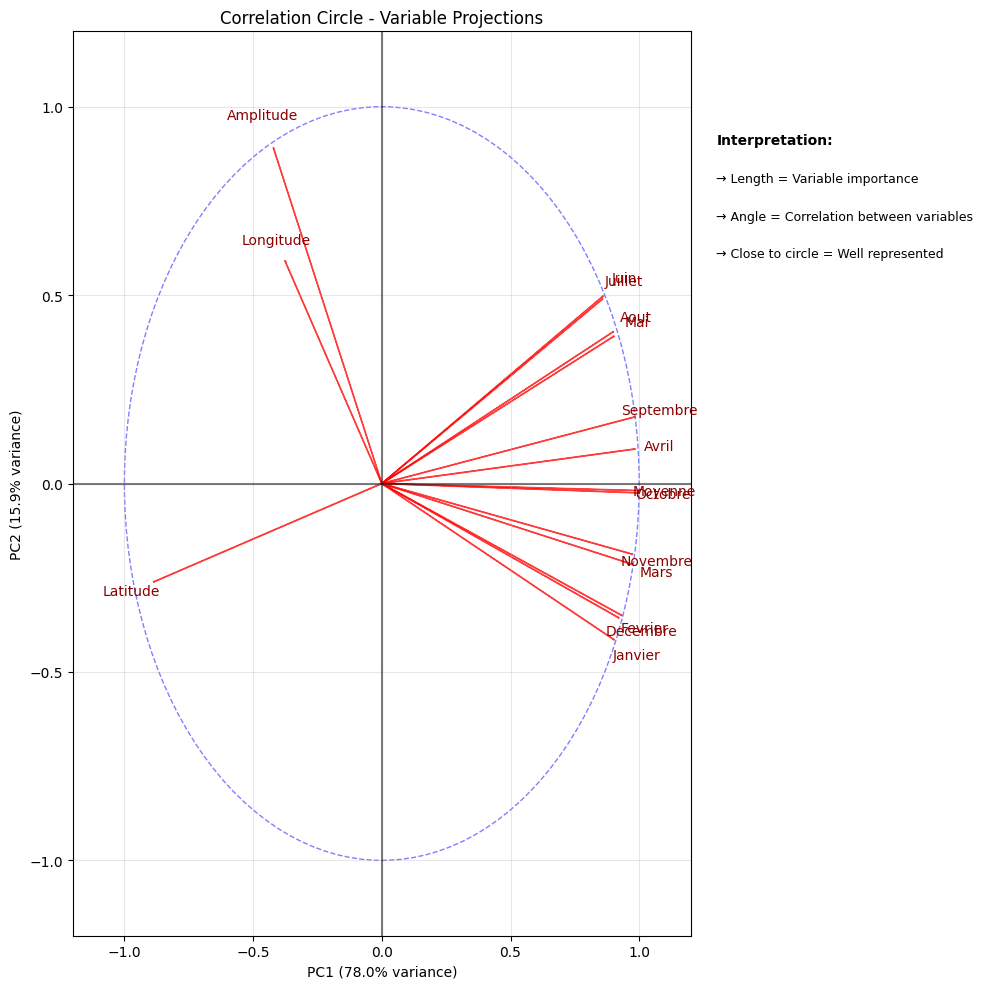

In [62]:
def plot_correlation_circle(variable_coords, feature_names, explained_variance_ratio):
    """
    Plot the correlation circle showing variables in factorial space
    """
    print(np.sqrt(variable_coords[0][0]**2+variable_coords[0][1]**2))
    plt.figure(figsize=(10, 10))
    
    # Create unit circle
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='--', alpha=0.5)
    plt.gca().add_artist(circle)
    
    # Plot variables as vectors from origin
    for i, (x, y) in enumerate(variable_coords):
        plt.arrow(0, 0, x, y, 
                 fc='red', ec='red', alpha=0.7)
        plt.text(x * 1.1, y * 1.1, feature_names[i], fontsize=10, 
                ha='center', va='center', color='darkred')
    
    # Set limits and labels
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
    plt.title('Correlation Circle - Variable Projections')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)
    
    # Add interpretation guide
    plt.text(1.3, 0.9, 'Interpretation:', fontweight='bold')
    plt.text(1.3, 0.8, '→ Length = Variable importance', fontsize=9)
    plt.text(1.3, 0.7, '→ Angle = Correlation between variables', fontsize=9)
    plt.text(1.3, 0.6, '→ Close to circle = Well represented', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Plot correlation circle
plot_correlation_circle(variable_coordinates, feature_names, pca_2.explained_variance_ratio_)

The main climate determinant is LATITUDE, which accounts for 78% of temperature variability. THERMAL AMPLITUDE (continentality) explains an additional 16% and acts independently. LONGITUDE has minimal influence on annual average temperatures.

In [63]:
def analyze_variable_contributions(pca, feature_names, n_top=5):
    """
    Analyze which variables contribute most to each principal component
    """
    
    # Get the components (eigenvectors)
    components = pca.components_
    
    print("=== VARIABLE CONTRIBUTIONS TO PRINCIPAL COMPONENTS ===")
    
    # Analyze PC1
    print(f"\n--- PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance) ---")
    pc1_contributions = components[0]
    
    # Positive contributions to PC1
    positive_idx = np.argsort(pc1_contributions)[-n_top:][::-1]
    print("Positive contributions (define positive end of PC1):")
    for idx in positive_idx:
        print(f"  • {feature_names[idx]}: {pc1_contributions[idx]:.3f}")
    
    # Negative contributions to PC1
    negative_idx = np.argsort(pc1_contributions)[:n_top]
    print("\nNegative contributions (define negative end of PC1):")
    for idx in negative_idx:
        print(f"  • {feature_names[idx]}: {pc1_contributions[idx]:.3f}")
    
    # Analyze PC2
    print(f"\n--- PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance) ---")
    pc2_contributions = components[1]
    
    # Positive contributions to PC2
    positive_idx = np.argsort(pc2_contributions)[-n_top:][::-1]
    print("Positive contributions (define positive end of PC2):")
    for idx in positive_idx:
        print(f"  • {feature_names[idx]}: {pc2_contributions[idx]:.3f}")
    
    # Negative contributions to PC2
    negative_idx = np.argsort(pc2_contributions)[:n_top]
    print("\nNegative contributions (define negative end of PC2):")
    for idx in negative_idx:
        print(f"  • {feature_names[idx]}: {pc2_contributions[idx]:.3f}")
    
    return components

# Analyze variable contributions
variable_contributions = analyze_variable_contributions(pca_2, feature_names)

=== VARIABLE CONTRIBUTIONS TO PRINCIPAL COMPONENTS ===

--- PC1 (78.0% variance) ---
Positive contributions (define positive end of PC1):
  • Moyenne: 0.282
  • Octobre: 0.281
  • Avril: 0.278
  • Septembre: 0.277
  • Novembre: 0.275

Negative contributions (define negative end of PC1):
  • Latitude: -0.250
  • Amplitude: -0.119
  • Longitude: -0.106
  • Juillet: 0.242
  • Juin: 0.243

--- PC2 (15.9% variance) ---
Positive contributions (define positive end of PC2):
  • Amplitude: 0.557
  • Longitude: 0.369
  • Juin: 0.311
  • Juillet: 0.306
  • Aout: 0.252

Negative contributions (define negative end of PC2):
  • Janvier: -0.259
  • Decembre: -0.223
  • Fevrier: -0.219
  • Latitude: -0.163
  • Mars: -0.134


In [66]:
def combined_analysis(c, cities, variable_coords, feature_names, pca, temperature_data=None, latitudes=None):
    """
    Combined analysis of observations and variables to identify groups and patterns
    """
    
    print("=== COMBINED ANALYSIS: OBSERVATIONS AND VARIABLES ===")
    
    # Identify observation groups based on quadrant positions
    print("\n--- OBSERVATION GROUPS ---")
    
    # Define quadrants
    quadrant_1 = (c[:, 0] > 0) & (c[:, 1] > 0)  # Top-right
    quadrant_2 = (c[:, 0] < 0) & (c[:, 1] > 0)  # Top-left
    quadrant_3 = (c[:, 0] < 0) & (c[:, 1] < 0)  # Bottom-left
    quadrant_4 = (c[:, 0] > 0) & (c[:, 1] < 0)  # Bottom-right
    
    print(f"Quadrant 1 (Positive PC1, Positive PC2): {[cities[i] for i in np.where(quadrant_1)[0]]}")
    print(f"Quadrant 2 (Negative PC1, Positive PC2): {[cities[i] for i in np.where(quadrant_2)[0]]}")
    print(f"Quadrant 3 (Negative PC1, Negative PC2): {[cities[i] for i in np.where(quadrant_3)[0]]}")
    print(f"Quadrant 4 (Positive PC1, Negative PC2): {[cities[i] for i in np.where(quadrant_4)[0]]}")
    
    # Identify clusters using simple thresholding
    print("\n--- POTENTIAL CLUSTERS ---")
    
    # Cluster 1: High positive PC1
    cluster_1 = c[:, 0] > np.percentile(c[:, 0], 70)
    if np.any(cluster_1):
        print(f"High PC1 cluster: {[cities[i] for i in np.where(cluster_1)[0]]}")
    
    # Cluster 2: High negative PC1
    cluster_2 = c[:, 0] < np.percentile(c[:, 0], 30)
    if np.any(cluster_2):
        print(f"Low PC1 cluster: {[cities[i] for i in np.where(cluster_2)[0]]}")
    
    # Cluster 3: High positive PC2
    cluster_3 = c[:, 1] > np.percentile(c[:, 1], 70)
    if np.any(cluster_3):
        print(f"High PC2 cluster: {[cities[i] for i in np.where(cluster_3)[0]]}")
    
    # Cluster 4: High negative PC2
    cluster_4 = c[:, 1] < np.percentile(c[:, 1], 30)
    if np.any(cluster_4):
        print(f"Low PC2 cluster: {[cities[i] for i in np.where(cluster_4)[0]]}")
    
    # Characterize each group based on variable associations
    print("\n--- GROUP CHARACTERISTICS ---")
    
    # Get top variables for interpretation
    top_pc1_positive = np.argsort(variable_coords[:, 0])[-3:][::-1]
    top_pc1_negative = np.argsort(variable_coords[:, 0])[:3]
    top_pc2_positive = np.argsort(variable_coords[:, 1])[-3:][::-1]
    top_pc2_negative = np.argsort(variable_coords[:, 1])[:3]
    
    print("Variables defining PC1 positive end:")
    for idx in top_pc1_positive:
        print(f"  • {feature_names[idx]}: {variable_coords[idx, 0]:.3f}")
    
    print("\nVariables defining PC1 negative end:")
    for idx in top_pc1_negative:
        print(f"  • {feature_names[idx]}: {variable_coords[idx, 0]:.3f}")
    
    print("\nVariables defining PC2 positive end:")
    for idx in top_pc2_positive:
        print(f"  • {feature_names[idx]}: {variable_coords[idx, 1]:.3f}")
    
    print("\nVariables defining PC2 negative end:")
    for idx in top_pc2_negative:
        print(f"  • {feature_names[idx]}: {variable_coords[idx, 1]:.3f}")

# Perform combined analysis
combined_analysis(c, first_column, variable_coordinates, feature_names, pca_2)

=== COMBINED ANALYSIS: OBSERVATIONS AND VARIABLES ===

--- OBSERVATION GROUPS ---
Quadrant 1 (Positive PC1, Positive PC2): ['Athenes', 'Budapest', 'Madrid', 'Rome', 'Genes', 'Milan', 'Palerme', 'Seville']
Quadrant 2 (Negative PC1, Positive PC2): ['Helsinki', 'Kiev', 'Cracovie', 'Minsk', 'Moscou', 'Prague', 'Sarajevo', 'Sofia', 'Stockholm', 'Geneve', 'St_Petersbourg']
Quadrant 3 (Negative PC1, Negative PC2): ['Amsterdam', 'Berlin', 'Bruxelles', 'Copenhague', 'Dublin', 'Londres', 'Oslo', 'Reykjavik', 'Anvers', 'Edimbourg', 'Francfort', 'Zurich']
Quadrant 4 (Positive PC1, Negative PC2): ['Lisbonne', 'Paris', 'Barcelone', 'Bordeaux']

--- POTENTIAL CLUSTERS ---
High PC1 cluster: ['Athenes', 'Lisbonne', 'Madrid', 'Paris', 'Rome', 'Barcelone', 'Bordeaux', 'Genes', 'Milan', 'Palerme', 'Seville']
Low PC1 cluster: ['Copenhague', 'Helsinki', 'Kiev', 'Cracovie', 'Minsk', 'Moscou', 'Oslo', 'Reykjavik', 'Stockholm', 'Edimbourg', 'St_Petersbourg']
High PC2 cluster: ['Athenes', 'Budapest', 'Helsinki'

1. Dual Climate Classification: European cities can be classified simultaneously by:

- North-South axis (average temperature)

- Continental-Maritime axis (thermal amplitude)

2. Clear Geographic Patterns:

- Northwest: Cold + Maritime

- Northeast: Cold + Continental

- Southwest: Warm + Maritime

- Southeast: Warm + Continental

3. Interesting exceptions:

- Budapest and Milan appear as "Continental South" despite not being the southernmost

- Geneve appears as "Continental North" for its altitude and remoteness from the sea

4. Confirmation of Climate Theories:

- Oceanic influence softens temperatures (low amplitude)

- Continentality extremiza temperatures (high amplitude)

- Latitude is the dominant factor in average temperatures